# **Exploratory Data Analysis**


## Objectives


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


Import the pandas module.


In [17]:
import pandas as pd

Load the dataset into a dataframe.


<h2>Read Data</h2>

In [18]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [19]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [20]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [21]:
df = pd.read_csv(file_name)

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


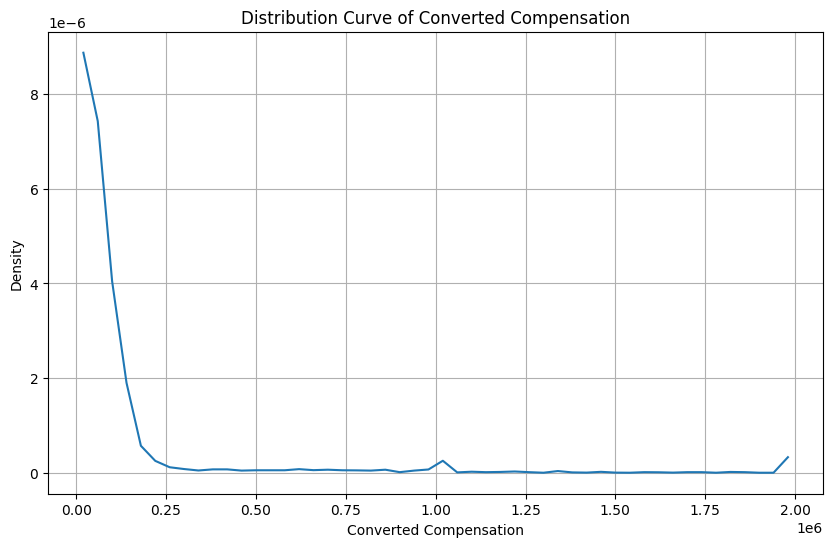

In [39]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
values = df['ConvertedComp'].dropna()
density = np.histogram(values, bins=50, density=True)
bin_centers = 0.5 * (density[1][1:] + density[1][:-1])
plt.plot(bin_centers, density[0], '-')
plt.title('Distribution Curve of Converted Compensation')
plt.xlabel('Converted Compensation')
plt.ylabel('Density')
plt.grid(True)
plt.show()

Plot the histogram for the column `ConvertedComp`.


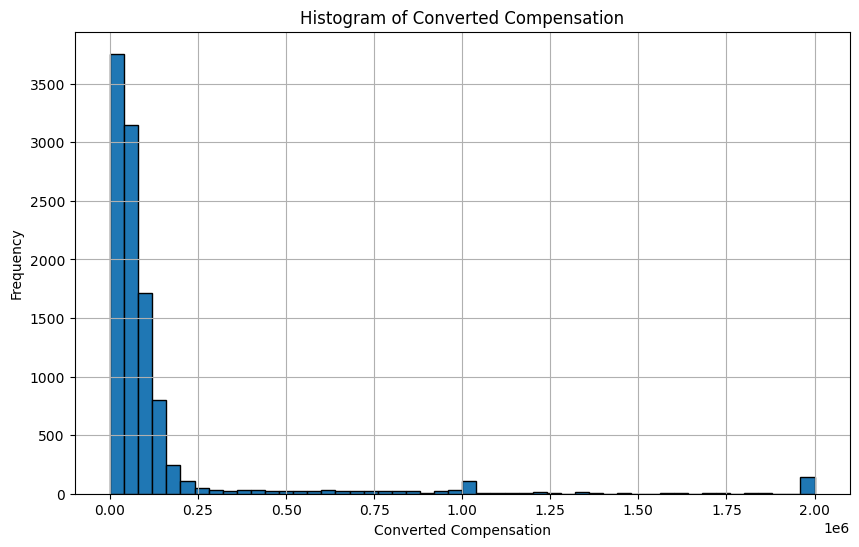

In [40]:
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'].dropna(), bins=50, edgecolor='k')
plt.title('Histogram of Converted Compensation')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

What is the median of the column `ConvertedComp`?


In [41]:
median_convertedcomp = df['ConvertedComp'].median()
print(f"Median of Converted Compensation: {median_convertedcomp}")

Median of Converted Compensation: 57745.0


How many responders identified themselves only as a **Man**?


In [42]:
num_men = df[df['Gender'] == 'Man'].shape[0]
print(f"Number of responders identified themselves only as a Man: {num_men}")

Number of responders identified themselves only as a Man: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [43]:
median_woman_convertedcomp = df[df['Gender'] == 'Woman']['ConvertedComp'].median()
print(f"Median Converted Compensation of responders identified themselves only as a Woman: {median_woman_convertedcomp}")

Median Converted Compensation of responders identified themselves only as a Woman: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [44]:
five_num_summary_age = df['Age'].describe()[['min', '25%', '50%', '75%', 'max']]
print(f"Five number summary for the column Age:\n{five_num_summary_age}")

Five number summary for the column Age:
min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


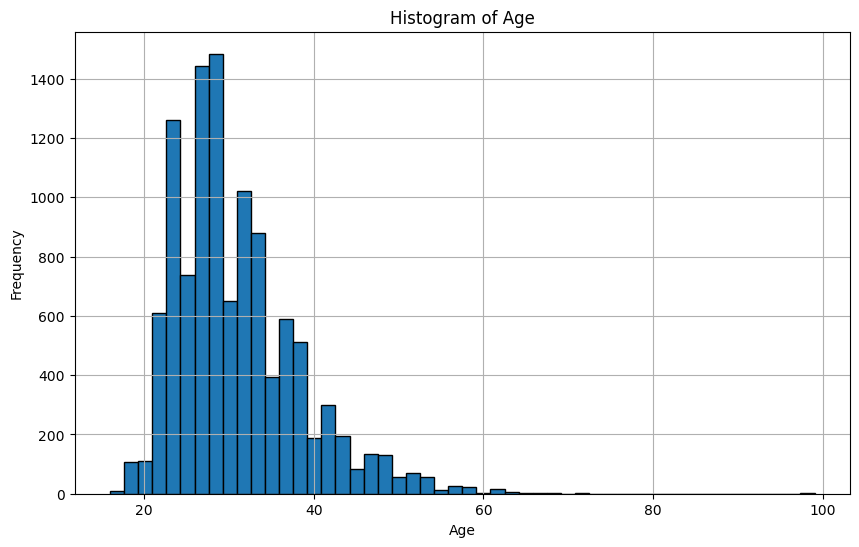

In [45]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'].dropna(), bins=50, edgecolor='k')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


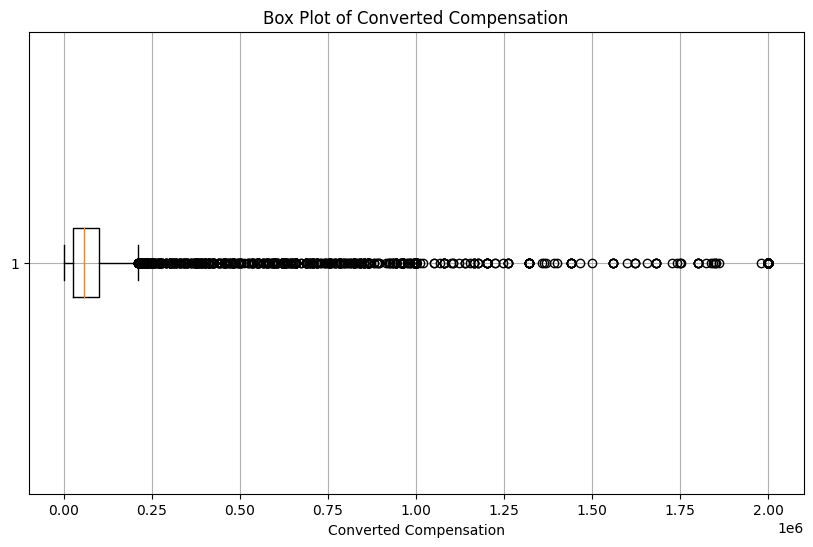

In [46]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['ConvertedComp'].dropna(), vert=False)
plt.title('Box Plot of Converted Compensation')
plt.xlabel('Converted Compensation')
plt.grid(True)
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [47]:
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
print(f"Inter Quartile Range (IQR) for Converted Compensation: {IQR}")

Inter Quartile Range (IQR) for Converted Compensation: 73132.0


Find out the upper and lower bounds.


In [48]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")

Lower bound: -82830.0, Upper bound: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [49]:
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]
num_outliers = outliers.shape[0]
print(f"Number of outliers in Converted Compensation: {num_outliers}")

Number of outliers in Converted Compensation: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [50]:
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [52]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
age_correlations = correlation_matrix['Age'].dropna()
print(f"Correlation between Age and all other numerical columns:\n{age_correlations}")

Correlation between Age and all other numerical columns:
Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
